# Init

In [38]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Conv1D, MaxPooling1D, MaxPooling2D, BatchNormalization
from keras.utils import to_categorical
from keras.losses import SparseCategoricalCrossentropy
from keras import optimizers, metrics
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder
import copy
from livelossplot import PlotLossesKeras
from livelossplot.outputs import MatplotlibPlot

In [50]:
optimizers_dict = {
    'SGD': optimizers.SGD(),
    'RMSprop': optimizers.RMSprop(),
    'Adam': optimizers.Adam(),
    'Adadelta': optimizers.Adadelta(),
    'Adagrad': optimizers.Adagrad(),
    'Adamax': optimizers.Adamax(),
    'Nadam': optimizers.Nadam(),
    'Ftrl': optimizers.Ftrl()
}

metrics = [metrics.MeanSquaredError(), metrics.BinaryAccuracy(), metrics.CategoricalAccuracy(), 
           metrics.AUC(), metrics.Precision(), metrics.Recall(), metrics.FalsePositives(), 
           metrics.FalseNegatives(), metrics.TruePositives(), metrics.TrueNegatives()]

# Base

In [ ]:
def getModel(in_dim, out_dim, optimizer, metrics):
    model = Sequential()
    model.add(Dense(10, input_dim=in_dim, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(out_dim, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=metrics)
    return model

def fitWithKfold(X, y ,model, epochs):
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    train, test = kfold.split(X)
    for train, test in kfold.split(X):
        model.fit(X[train], y[train], epochs=epochs, batch_size=10, verbose=0)
        scores = model.evaluate(X[test], y[test], verbose=0)


    # Wyświetlenie wyników walidacji krzyżowej K-fold
    for i, names in enumerate(model.metrics_names):
        print(f'Metric: {names} -> Score: {scores[i]}')

# Iris

In [35]:
def loadPreapreDataForIris(datafile, skiprows = 0, delimiter=","):
    dataset = pd.read_csv(datafile,delimiter=delimiter, skiprows=skiprows)
    X = dataset.iloc[:, :-1].values
    y = dataset.iloc[:, -1].values

    encoder = LabelEncoder()
    encoder.fit(y)
    y_enc = encoder.transform(y)
    y_cat = to_categorical(y_enc)
    print(X[0].size, y_cat[0].size)
    return (X, y_cat, X[0].size, y_cat[0].size)

In [33]:
def getModelForIris(in_dim, out_dim, optimizer, metrics):
    model = Sequential()
    model.add(Conv1D(64, 3, activation='relu', input_shape=(in_dim, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(out_dim, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=metrics)
    return model

def fitWithKfold(X, y, model, epochs, i):
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    
    napis = "sciezka_" + str(i) + ".png"
    for train, test in kfold.split(X):
        model.fit(X[train].reshape(X[train].shape[0], X[train].shape[1], 1), y[train], epochs=epochs, batch_size=10, verbose=0, callbacks = [PlotLossesKeras(outputs=[MatplotlibPlot(figpath = napis)])])
        scores = model.evaluate(X[test].reshape(X[test].shape[0], X[test].shape[1], 1), y[test], verbose=0)
        
    # Wyświetlenie wyników walidacji krzyżowej K-fold
    for i, names in enumerate(model.metrics_names):
        print(f'Metric: {names} -> Score: {scores[i]}')

KeyboardInterrupt: 

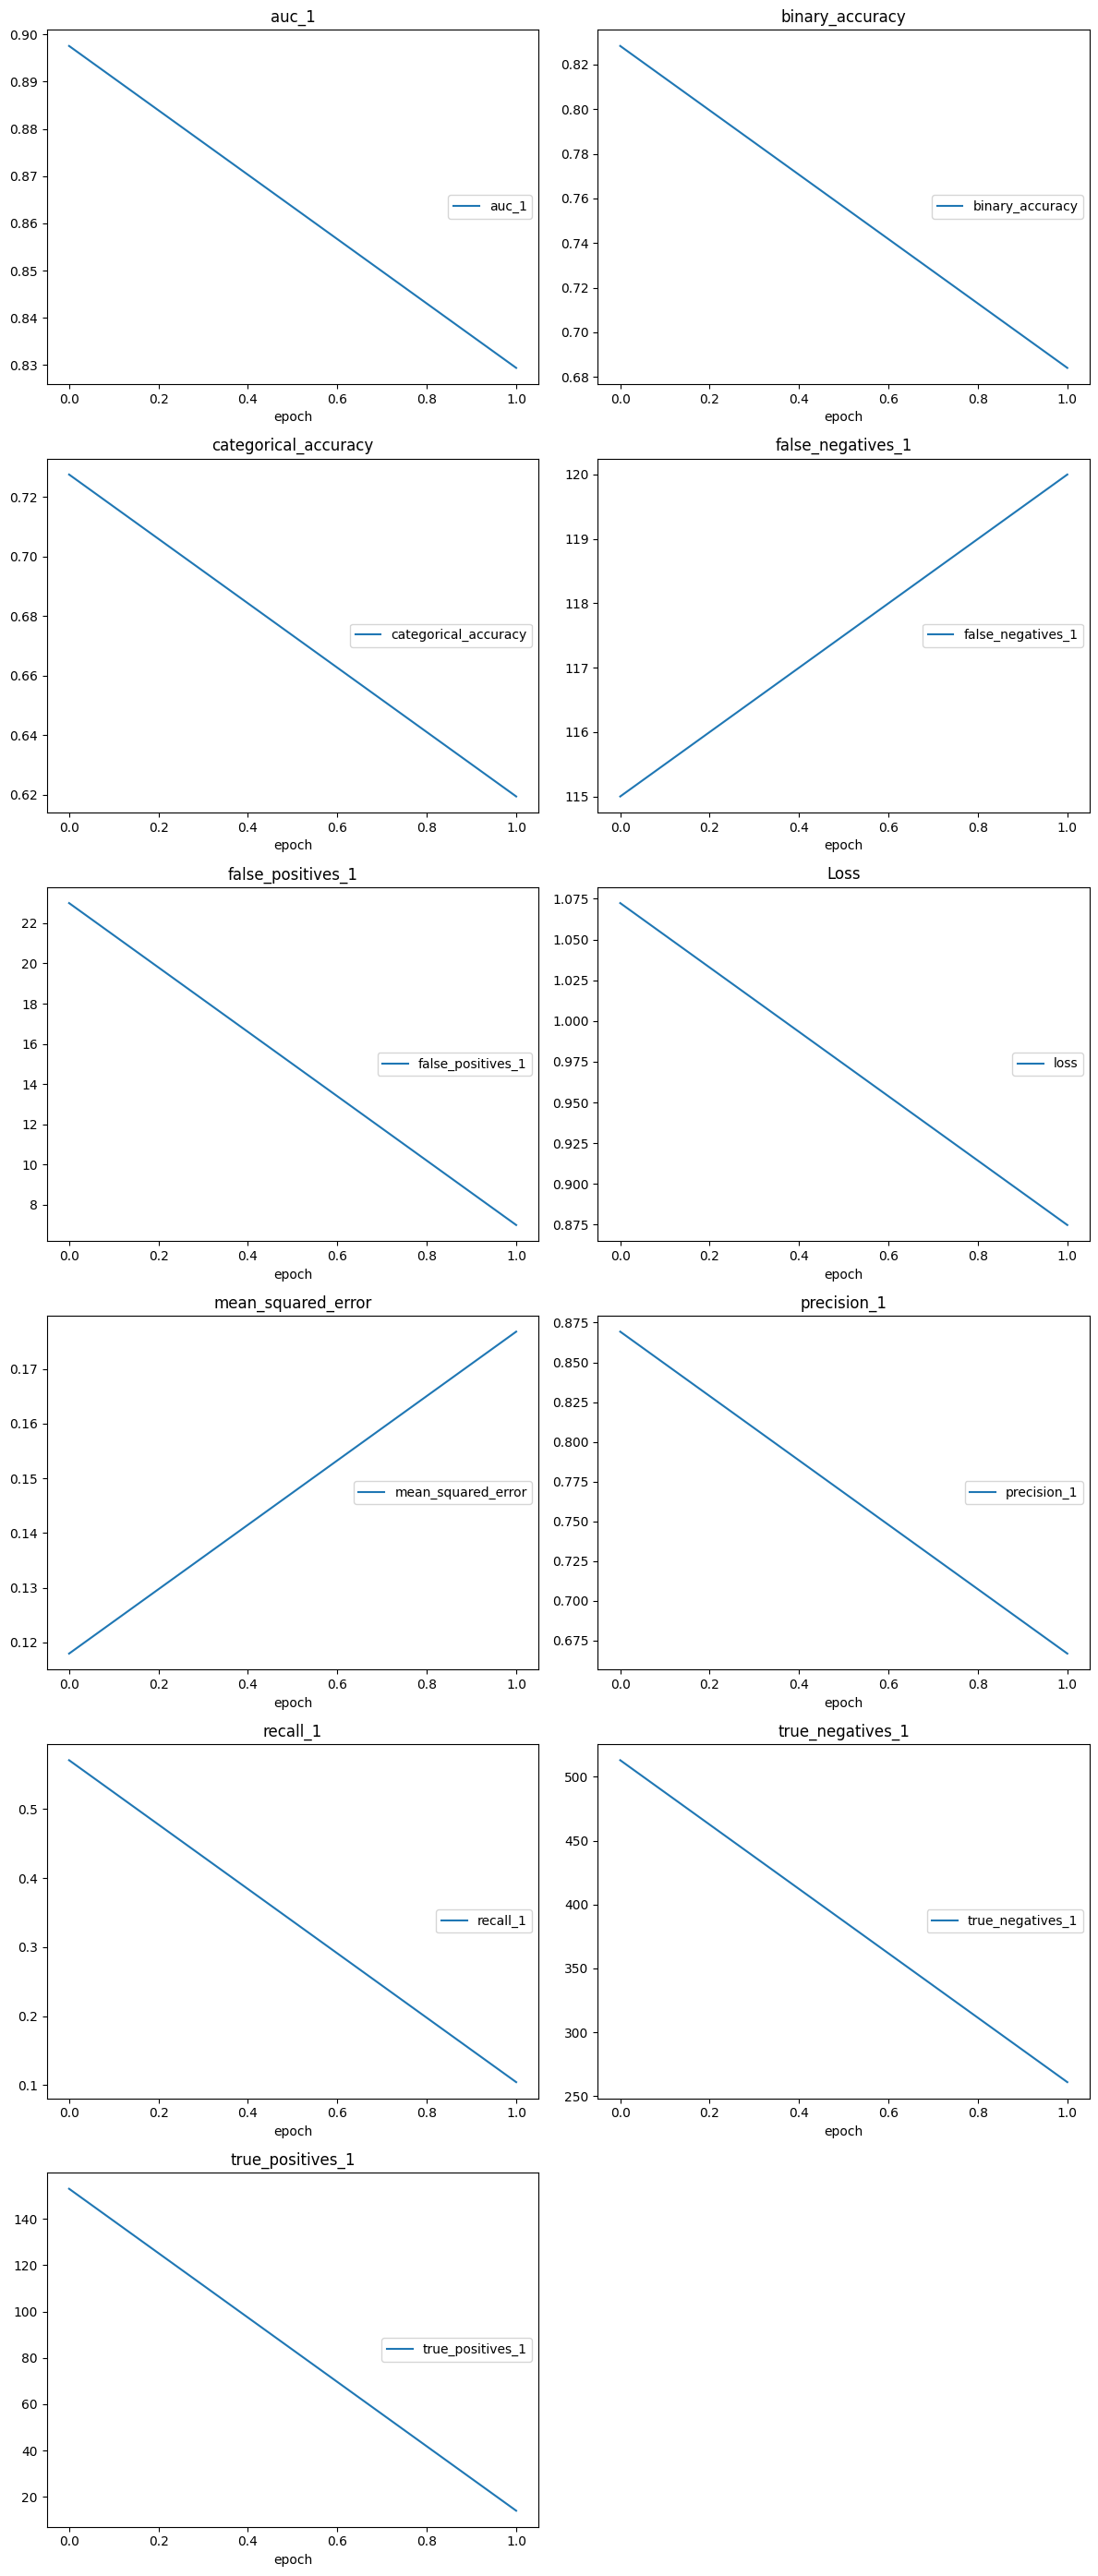

In [34]:
X, y, in_dim, out_dim = loadPreapreDataForIris("iris.data")
i = 0
for oprimizer_name,oprimizer in optimizers_dict.items():
    model = getModelForIris(in_dim,out_dim,oprimizer,metrics)
    print("\nIris classyfication model for optimizer: "+ oprimizer_name)
    fitWithKfold(X, y ,model, 50, i)
    i+=1

# Cars

In [7]:
# def loadPreapreData_Cars(datafile):
#     dataset = pd.read_csv(datafile, na_values=['?'])
    
#     X = dataset.iloc[:, :-1].values
#     y = dataset.iloc[:, -1].values
    
#     X_enc=copy.deepcopy(X)

#     for i in range(X[0].size):
#         encoder = LabelEncoder()
#         encoder.fit(X[:,i])
#         X_enc[:,i] = encoder.transform(X[:,i]).astype("float")
#         # X_enc[:,i] = X_enc[:,i]/max(X_enc[:,i])

#     encoder = LabelEncoder()
#     encoder.fit(y)
#     y_enc = encoder.transform(y)

#     y_cat = to_categorical(y_enc)

#     return (X_enc, y_cat, X_enc[0].size, y_cat[0].size)

In [8]:
# def loadPreapreData_Cars(datafile):
#     dataset = pd.read_csv(datafile, header=0, delimiter=',')
    
#     # X = dataset.iloc[:, :-1].values
#     # y = dataset.iloc[:, -1].values
    
#     dataset['vhigh'],_ = pd.factorize(dataset['vhigh'])
#     dataset['vhigh.1'],_ = pd.factorize(dataset['vhigh.1'])
#     dataset['2'],_ = pd.factorize(dataset['2'])
#     dataset['2.1'],_ = pd.factorize(dataset['2.1'])
#     dataset['small'],_ = pd.factorize(dataset['small'])
#     dataset['low'],_ = pd.factorize(dataset['low'])
#     dataset['unacc'],_ = pd.factorize(dataset['unacc'])
    
#     X = dataset.iloc[:, :-1]
#     y = dataset.iloc[:, -1]
    
    
#     # X_enc=copy.deepcopy(X)

#     # for i in range(X[0].size):
#     #     encoder = LabelEncoder()
#     #     encoder.fit(X[:,i])
#     #     X_enc[:,i] = encoder.transform(X[:,i]).astype("float")
#     #     # X_enc[:,i] = X_enc[:,i]/max(X_enc[:,i])

#     # encoder = LabelEncoder()
#     # encoder.fit(y)
#     # y_enc = encoder.transform(y)

#     # y_cat = to_categorical(y_enc)

#     return (X.to_numpy, y.to_numpy, X.shape[1], 1)
# def loadPreapreData_Cars(datafile):
#     dataset = pd.read_csv(datafile)
#     X = dataset.iloc[:, :-1].values
#     y = dataset.iloc[:, -1].values

#     encoder = LabelEncoder()
#     encoder.fit(y)
#     y_enc = encoder.transform(y)
#     y_cat = to_categorical(y_enc)

#     return (X, y_cat, X[0].size, y_cat[0].size)

# X, y, X_s, y_s = loadPreapreData_Cars("car.data")
# print(X)
# print(y)

In [9]:
# X, y, in_dim, out_dim = loadPreapreData_Cars("car.data")
# # print(X)
# model = getModel(in_dim,out_dim,"adam",["accuracy"])
# fitWithKfold(X, y ,model, 50)

# Dry_Bean

In [10]:
X, y, in_dim, out_dim = loadPreapreData("Dry_Bean_Dataset.arff",25)
for oprimizer_name,oprimizer in optimizers_dict.items():
    model = getModel(in_dim,out_dim,oprimizer,metrics)
    print("\nDryBeans classyfication model for optimizer: "+ oprimizer_name)
    fitWithKfold(X, y ,model, 10)


DryBeans classyfication model for optimizer: SGD
Metric: loss -> Score: 1.8363672494888306
Metric: mean_squared_error -> Score: 0.11821090430021286
Metric: binary_accuracy -> Score: 0.8571428656578064
Metric: categorical_accuracy -> Score: 0.2652461528778076
Metric: auc -> Score: 0.6463385224342346
Metric: precision -> Score: 0.0
Metric: recall -> Score: 0.0
Metric: false_positives -> Score: 0.0
Metric: false_negatives -> Score: 1361.0
Metric: true_positives -> Score: 0.0
Metric: true_negatives -> Score: 8166.0

DryBeans classyfication model for optimizer: RMSprop
Metric: loss -> Score: 1.8374723196029663
Metric: mean_squared_error -> Score: 0.11824189126491547
Metric: binary_accuracy -> Score: 0.8571428656578064
Metric: categorical_accuracy -> Score: 0.2652461528778076
Metric: auc -> Score: 0.6463385224342346
Metric: precision -> Score: 0.0
Metric: recall -> Score: 0.0
Metric: false_positives -> Score: 0.0
Metric: false_negatives -> Score: 1361.0
Metric: true_positives -> Score: 0.0


# Raisin

In [55]:
def loadPrepareDataforRaisin(datafile, skiprows = 0, delimiter=","):
    dataset = pd.read_csv(datafile,delimiter=delimiter, skiprows=skiprows)
    dataset = dataset.dropna()
    X = dataset.iloc[:, :-1].values
    y = dataset.iloc[:, -1].values

    encoder = LabelEncoder()
    encoder.fit(y)
    y_enc = encoder.transform(y)
    y_cat = to_categorical(y_enc)
    #print(X)
    #print(f"X size: {X[0].size}, Y size: {y_cat[0].size}")
    return (X, y_cat, X[0].size, y_cat[0].size)

In [54]:
def getModelForRaisin(in_dim, out_dim, optimizer, metric):
    model = Sequential()
    model.add(Conv1D(16, 3, activation='relu', input_shape=(in_dim, 1)))
    model.add(BatchNormalization())
    model.add(Conv1D(16, 3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dense(out_dim, activation='softmax')) 
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=metric)
    return model

def fitWithKfold(X, y, model, epochs):
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    for train, test in kfold.split(X):
        model.fit(X[train], y[train], epochs=epochs, batch_size=10, verbose=0)
        scores = model.evaluate(X[test], y[test], verbose=0)


    # Wyświetlenie wyników walidacji krzyżowej K-fold
    for i, names in enumerate(model.metrics_names):
        print(f'Metric: {names} -> Score: {scores[i]}')

In [56]:
X, y, in_dim, out_dim = loadPrepareDataforRaisin("Raisin_Dataset.arff",18)
for oprimizer_name,oprimizer in optimizers_dict.items():
    model = getModelForRaisin(in_dim, out_dim, oprimizer, metrics)
    print("\nRaisin classyfication model for optimizer: "+ oprimizer_name)
    fitWithKfold(X, y, model, 20)


Raisin classyfication model for optimizer: SGD
Metric: loss -> Score: 0.32653361558914185
Metric: mean_squared_error -> Score: 0.10008251667022705
Metric: binary_accuracy -> Score: 0.8426966071128845
Metric: categorical_accuracy -> Score: 0.8426966071128845
Metric: auc_2 -> Score: 0.937886655330658
Metric: precision_2 -> Score: 0.8426966071128845
Metric: recall_2 -> Score: 0.8426966071128845
Metric: false_positives_2 -> Score: 14.0
Metric: false_negatives_2 -> Score: 14.0
Metric: true_positives_2 -> Score: 75.0
Metric: true_negatives_2 -> Score: 75.0

Raisin classyfication model for optimizer: RMSprop
Metric: loss -> Score: 0.2965462803840637
Metric: mean_squared_error -> Score: 0.08712397515773773
Metric: binary_accuracy -> Score: 0.898876428604126
Metric: categorical_accuracy -> Score: 0.898876428604126
Metric: auc_2 -> Score: 0.9495013356208801
Metric: precision_2 -> Score: 0.898876428604126
Metric: recall_2 -> Score: 0.898876428604126
Metric: false_positives_2 -> Score: 9.0
Metric

# Test

In [ ]:
from tensorflow.keras import datasets, layers, models, optimizers
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Hypothetical loading and preprocessing of "Raisin_Dataset"
# This is an example and will not work for an actual dataset
# Replace this part with the actual loading and preprocessing of your dataset
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
y_train = y_train.flatten()
y_test = y_test.flatten()

# K-fold Cross Validation model evaluation
fold_no = 1
num_folds = 5
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True)

# Define the model architecture
def create_model(optimizer):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10))  # Change the output size depending on your dataset's classes
    model.compile(optimizer=optimizer,
                  loss=losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    return model

# Optimizers dictionary
optimizers_dict = {
    'SGD': optimizers.SGD(),
    'RMSprop': optimizers.RMSprop(),
    'Adam': optimizers.Adam(),
    'Adadelta': optimizers.Adadelta(),
    'Adagrad': optimizers.Adagrad(),
    'Adamax': optimizers.Adamax(),
    'Nadam': optimizers.Nadam(),
    'Ftrl': optimizers.Ftrl()
}

# Loop for each optimizer
for optimizer_name, optimizer in optimizers_dict.items():
    print(f'Training for optimizer: {optimizer_name}')
    
    # K-fold Cross Validation model evaluation
    for train, test in kfold.split(X_train, y_train):

        model = create_model(optimizer)

        # Fit data to model
        history = model.fit(X_train[train], y_train[train], epochs=10, verbose=1)

        # Generate generalization metrics
        scores = model.evaluate(X_train[test], y_train[test], verbose=0)
        print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
        fold_no += 1
